In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/911.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11354 entries, 0 to 11353
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        11354 non-null  float64
 1   lng        11354 non-null  float64
 2   desc       11354 non-null  object 
 3   zip        9845 non-null   float64
 4   title      11354 non-null  object 
 5   timeStamp  11354 non-null  object 
 6   twp        11346 non-null  object 
 7   addr       11281 non-null  object 
 8   e          11353 non-null  float64
dtypes: float64(4), object(5)
memory usage: 798.5+ KB


In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1.0
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1.0
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1.0
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1.0


Top 5 ZIPCODES for 911 calls

In [7]:
df['zip'].value_counts().head(5)

19401.0    806
19464.0    730
19403.0    576
19446.0    564
19406.0    401
Name: zip, dtype: int64

Top 5 TOWNSHIPS for 911 calls

In [8]:
df['twp'].value_counts().head(5)

LOWER MERION    819
ABINGTON        692
NORRISTOWN      666
UPPER MERION    633
CHELTENHAM      515
Name: twp, dtype: int64

How many unique title codes are there?

In [9]:
df['title'].nunique()

84

In the titles column there are "Reasons/Departments" specified vefore the title code. There are EMS, Fire, and Traffic. Creating a new column called "Reason" that contains string value by using .apply().

In [10]:
x = df['title'].iloc[0]

In [11]:
x.split(':')[0]

'EMS'

In [12]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [13]:
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
11349       Fire
11350    Traffic
11351        EMS
11352       Fire
11353    Traffic
Name: Reason, Length: 11354, dtype: object

Most Common reasons for 911 call

In [14]:
df['Reason'].value_counts()

EMS        5675
Traffic    4068
Fire       1611
Name: Reason, dtype: int64

Result-> EMS is the most common reason

Countplot of 911 calls by Reason

<Axes: xlabel='Reason', ylabel='count'>

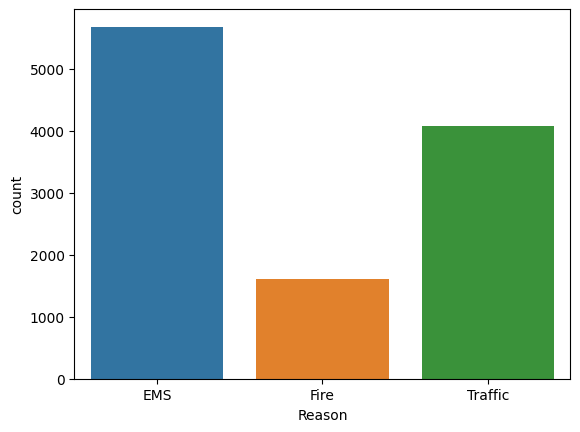

In [15]:
sns.countplot(x = 'Reason', data = df)

Data type of the objects in the timestamp column:

In [16]:
type(df['timeStamp'].iloc[0])

str

Converting the column from strings to DataTime objects using pd.to_datetime

In [17]:
df['timeStamp']= pd.to_datetime(df['timeStamp'])

In [18]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

Grabbing specific attributes from Datetime object by calling them.

In [19]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [20]:
time

Timestamp('2015-12-10 17:40:00')

In [21]:
time.year

2015

In [22]:
time.month

12

In [23]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [24]:
df['Hour']

0        17
1        17
2        17
3        17
4        17
         ..
11349     7
11350     7
11351     7
11352     7
11353     7
Name: Hour, Length: 11354, dtype: int64

In [25]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1.0,EMS,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0,EMS,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1.0,Fire,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1.0,EMS,17
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1.0,EMS,17


Two new columns are added at the end

Mapping actual string name to the day of the week  by using .map() to the day of week intergers 0 to 6.

In [34]:
df['dayofweek'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [27]:
df.drop(df.columns[-1], axis=1, inplace=True)

In [35]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1.0,EMS,17,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0,EMS,17,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1.0,Fire,17,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1.0,EMS,17,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1.0,EMS,17,3


In [36]:
dmap = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6:'Sun'}

In [37]:
df['Day of Week'] = df['dayofweek'].map(dmap)

In [31]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1.0,EMS,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0,EMS,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1.0,Fire,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1.0,EMS,17
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1.0,EMS,17


Couning plot of day od week column with the hues based off of the Reason Column

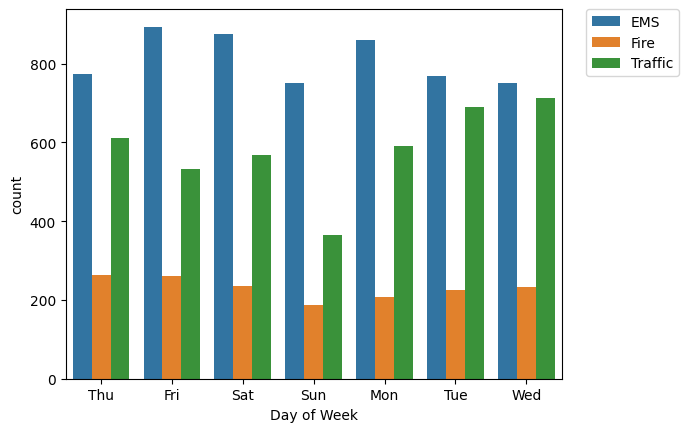

In [38]:
sns.countplot(x = 'Day of Week', data = df, hue='Reason')
plt.legend(bbox_to_anchor = (1.05,1), loc =2, borderaxespad =0.)

Similar plot for Month

In [39]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)

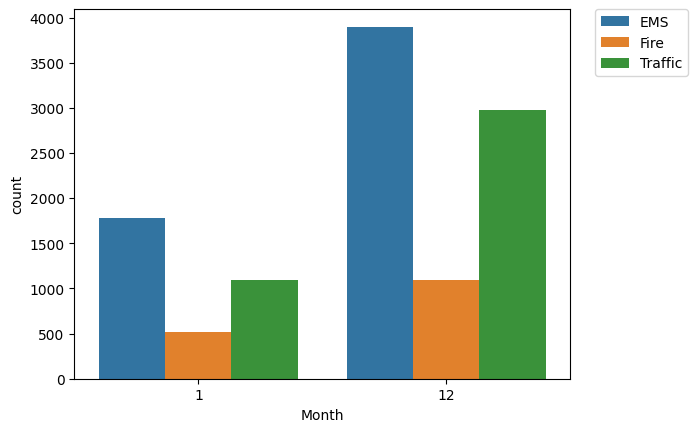

In [40]:
sns.countplot(x = 'Month', data = df, hue='Reason')
plt.legend(bbox_to_anchor = (1.05,1), loc =2, borderaxespad =0.)

Something strange about this plot -> Not all months are mentioned in the plot

In [41]:
byMonth = df.groupby('Month').count()

In [42]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,dayofweek,Day of Week
Month,,,,,,,,,,,,,
1,3385,3385,3385,2938,3385,3385,3383,3365,3384,3385,3385,3385,3385
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


Creating a simple plot off of the dataframe indicating the count of the calls per month.

<Axes: xlabel='Month'>

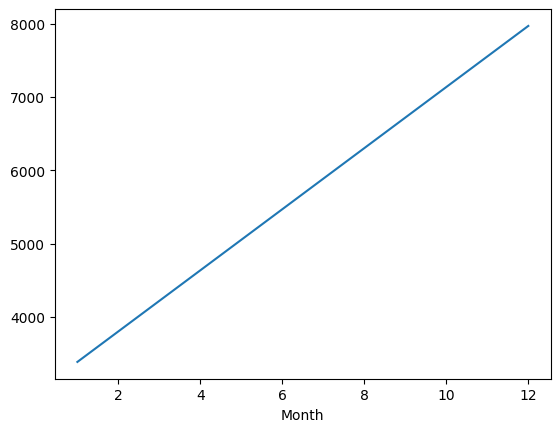

In [43]:
byMonth['lat'].plot()

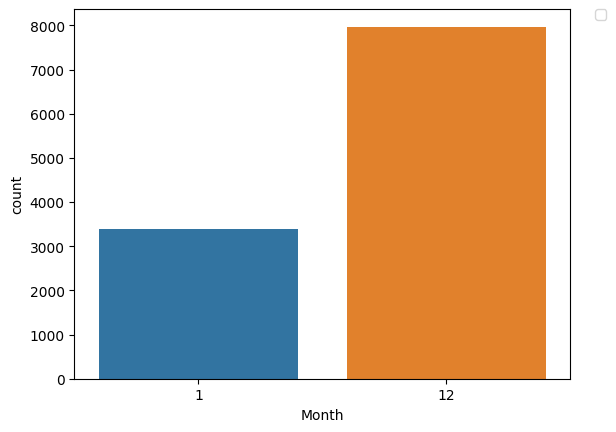

In [44]:
sns.countplot(x = 'Month', data = df)
plt.legend(bbox_to_anchor = (1.05,1), loc =2, borderaxespad =0.)

Creating linear fit on the numbers of the calls per month by using seaborn's .import().

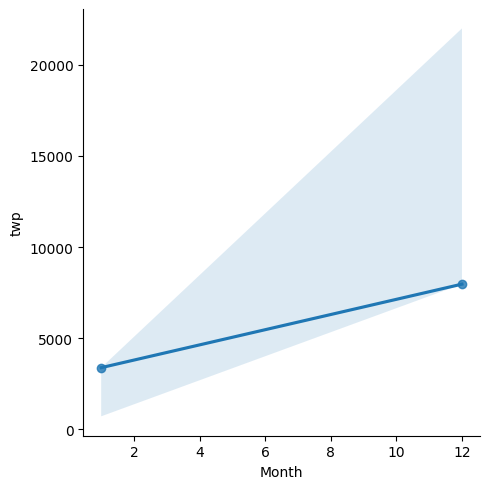

In [45]:
sns.lmplot(x = 'Month', y = 'twp', data = byMonth.reset_index())

Creating new column Date from the timestamp using .date() along with apply.

In [46]:
t = df['timeStamp'].iloc[0]

In [49]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

In [50]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,dayofweek,Day of Week,Month,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1.0,EMS,17,3,Thu,12,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0,EMS,17,3,Thu,12,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1.0,Fire,17,3,Thu,12,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1.0,EMS,17,3,Thu,12,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1.0,EMS,17,3,Thu,12,2015-12-10


In [47]:
t

Timestamp('2015-12-10 17:40:00')

In [48]:
t.date()

datetime.date(2015, 12, 10)

Now doing groupby this date column with the count() aggregate and creating a plot of counts of 911 calls.

In [51]:
df.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,dayofweek,Day of Week,Month
Date,,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447,447


for Dec 11, 2015, only 333 zip codes are available for 396 calls. This signifies that some data is missing.

In [53]:
df.groupby('Date').count()['lat']

Date
2015-12-10    115
2015-12-11    396
2015-12-12    403
2015-12-13    319
2015-12-14    447
2015-12-15    421
2015-12-16    377
2015-12-17    388
2015-12-18    346
2015-12-19    279
2015-12-20    271
2015-12-21    430
2015-12-22    448
2015-12-23    524
2015-12-24    445
2015-12-25    323
2015-12-26    296
2015-12-27    317
2015-12-28    380
2015-12-29    365
2015-12-30    361
2015-12-31    318
2016-01-01    263
2016-01-02    335
2016-01-03    324
2016-01-04    402
2016-01-05    448
2016-01-06    434
2016-01-07    385
2016-01-08    359
2016-01-09    365
2016-01-10     70
Name: lat, dtype: int64

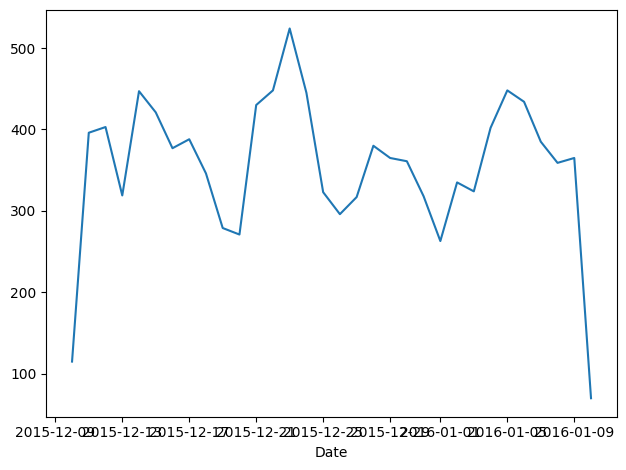

In [56]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

Recreating the plot but by creating 3 separate plots with each plot representing a Reason for the 911 Calls.

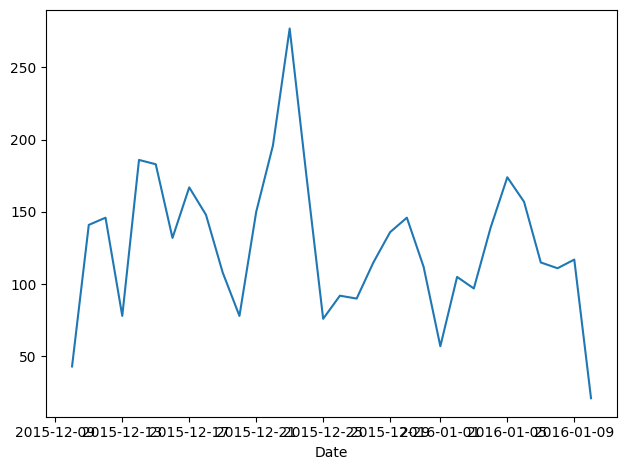

In [57]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

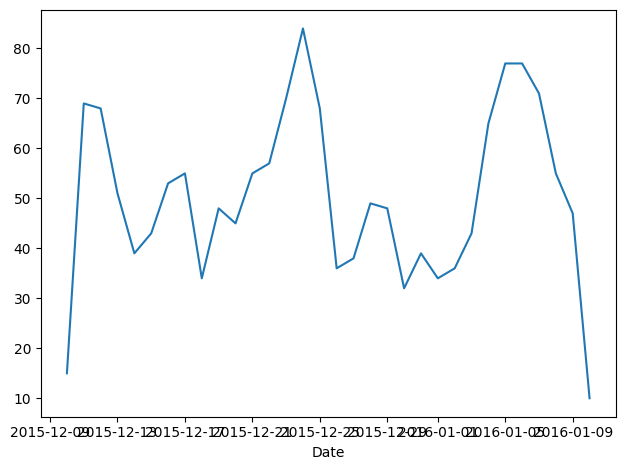

In [58]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

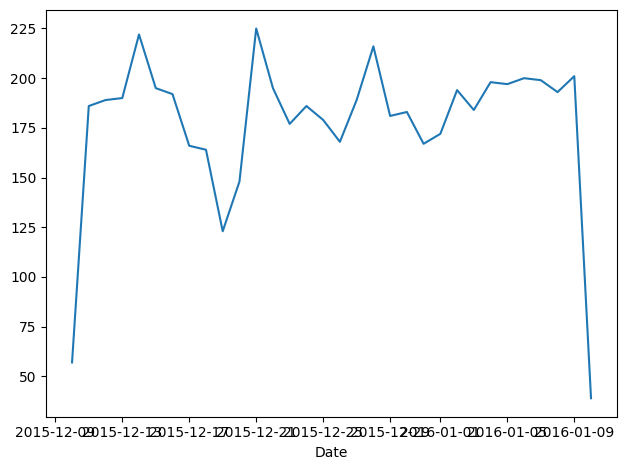

In [59]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

Heatmaps using seaborn for the data. First, restructuring the dataframe so that columns become hours and day of week becomes index.

In [60]:
### USING UNSTACK METHOD
df.groupby(by =['Day of Week', 'Hour']).count()

lat  lng  desc  zip  title  timeStamp  twp  addr   e  \
Day of Week Hour                                                         
Fri         0      37   37    37   34     37         37   37    37  37   
            1      26   26    26   22     26         26   26    25  26   
            2      32   32    32   26     32         32   32    32  32   
            3      22   22    22   21     22         22   22    22  22   
            4      26   26    26   23     26         26   26    26  26   
...               ...  ...   ...  ...    ...        ...  ...   ...  ..   
Wed         19     88   88    88   68     88         88   88    85  88   
            20     68   68    68   62     68         68   68    67  68   
            21     56   56    56   49     56         56   56    55  56   
            22     55   55    55   53     55         55   55    55  55   
            23     33   33    33   27     33         33   32    33  33   

                  Reason  dayofweek  Month  Date  
Day of Week Hour                                  
Fri         0         37         37     37    37  
            1         26         26     26    26  
            2         32         32     32    32  
            3         22         22     22    22  
            4         26         26     26    26  
...                  ...        ...    ...   ...  
Wed         19        88         88     88    88  
            20        68         68     68    68  
            21        56         56     56    56  
            22        55         55     55    55  
            23        33         33     33    33  

[168 rows x 13 columns]

In [63]:
### USING UNSTACK METHOD
df.groupby(by =['Day of Week', 'Hour']).count()['Reason']

Day of Week  Hour
Fri          0       37
             1       26
             2       32
             3       22
             4       26
                     ..
Wed          19      88
             20      68
             21      56
             22      55
             23      33
Name: Reason, Length: 168, dtype: int64

In [64]:
### USING UNSTACK METHOD
dayHour = df.groupby(by =['Day of Week', 'Hour']).count()['Reason'].unstack()

In [65]:
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,37,26,32,22,26,20,33,57,85,74,...,109,107,100,151,112,84,78,58,58,45
Mon,35,28,26,20,17,35,50,75,79,73,...,82,94,115,126,119,79,64,55,64,50
Sat,22,25,30,35,17,31,25,50,41,76,...,99,103,98,94,126,118,68,88,59,56
Sun,53,33,42,37,33,34,42,51,37,58,...,71,76,75,83,90,58,56,48,47,29
Thu,37,27,26,15,23,19,34,40,78,72,...,108,92,94,133,134,94,88,63,51,46
Tue,21,30,24,18,30,30,47,77,93,109,...,117,84,88,128,95,73,65,56,60,26
Wed,23,25,25,35,13,33,46,71,81,100,...,102,72,119,169,116,88,68,56,55,33


Creating heatmap using new DataFrame: dayHour

<Axes: xlabel='Hour', ylabel='Day of Week'>

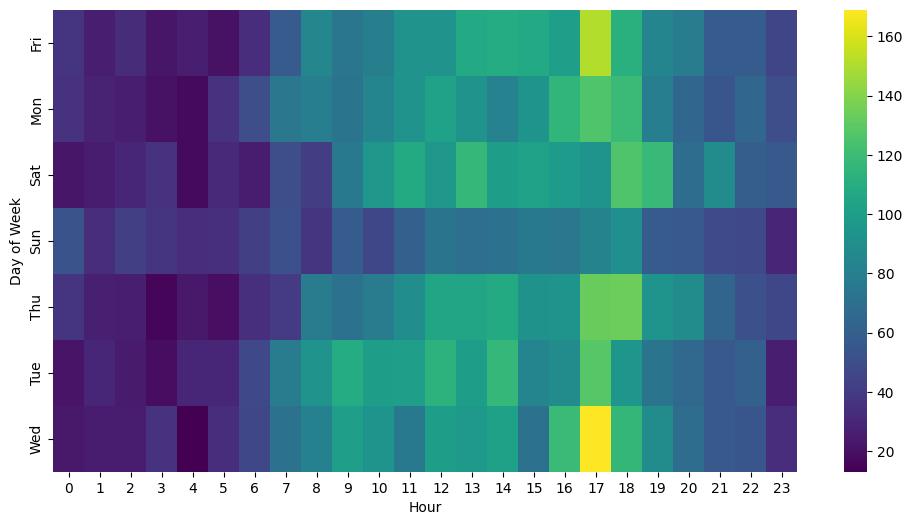

In [67]:
plt.figure(figsize= (12,6))
sns.heatmap(dayHour, cmap = 'viridis')

Observation: Midnight and early morning had least 911 calls as most people are asleep at that time. Most calls are at evening time which relates to Traffic being the most common reason.

Clustermap for the same:

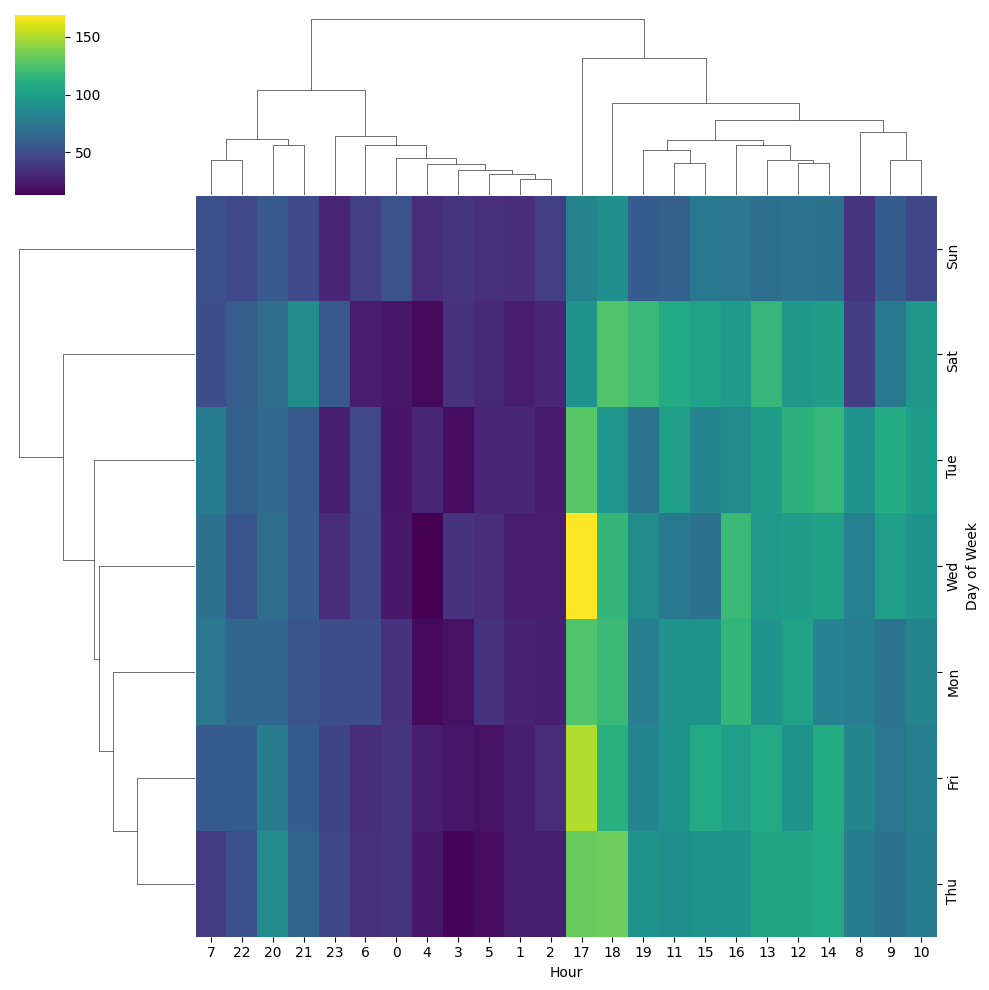

In [69]:
sns.clustermap(dayHour, cmap = 'viridis')

Repeating the same plots and the operations, for a Dataframe that shows the Months as the column

In [70]:
### USING UNSTACK METHOD
df.groupby(by =['Day of Week', 'Month']).count()

lat   lng  desc   zip  title  timeStamp   twp  addr     e  \
Day of Week Month                                                               
Fri         1       622   622   622   562    622        622   622   621   622   
            12     1065  1065  1065   906   1065       1065  1064  1060  1065   
Mon         1       402   402   402   346    402        402   402   401   402   
            12     1257  1257  1257  1101   1257       1257  1256  1253  1257   
Sat         1       700   700   700   618    700        700   699   691   700   
            12      978   978   978   832    978        978   978   960   978   
Sun         1       394   394   394   330    394        394   394   392   393   
            12      907   907   907   805    907        907   907   904   907   
Thu         1       385   385   385   334    385        385   385   385   385   
            12     1266  1266  1266  1090   1266       1266  1265  1258  1266   
Tue         1       448   448   448   373    448        448   448   445   448   
            12     1234  1234  1234  1092   1234       1234  1233  1232  1234   
Wed         1       434   434   434   375    434        434   433   430   434   
            12     1262  1262  1262  1081   1262       1262  1260  1249  1262   

                   Reason  Hour  dayofweek  Date  
Day of Week Month                                 
Fri         1         622   622        622   622  
            12       1065  1065       1065  1065  
Mon         1         402   402        402   402  
            12       1257  1257       1257  1257  
Sat         1         700   700        700   700  
            12        978   978        978   978  
Sun         1         394   394        394   394  
            12        907   907        907   907  
Thu         1         385   385        385   385  
            12       1266  1266       1266  1266  
Tue         1         448   448        448   448  
            12       1234  1234       1234  1234  
Wed         1         434   434        434   434  
            12       1262  1262       1262  1262

In [71]:
### USING UNSTACK METHOD
dayMonth = df.groupby(by =['Day of Week', 'Month']).count()['Reason'].unstack()

In [72]:
dayMonth

Month,1,12
Day of Week,,
Fri,622,1065
Mon,402,1257
Sat,700,978
Sun,394,907
Thu,385,1266
Tue,448,1234
Wed,434,1262


Heatmap:

<Axes: xlabel='Month', ylabel='Day of Week'>

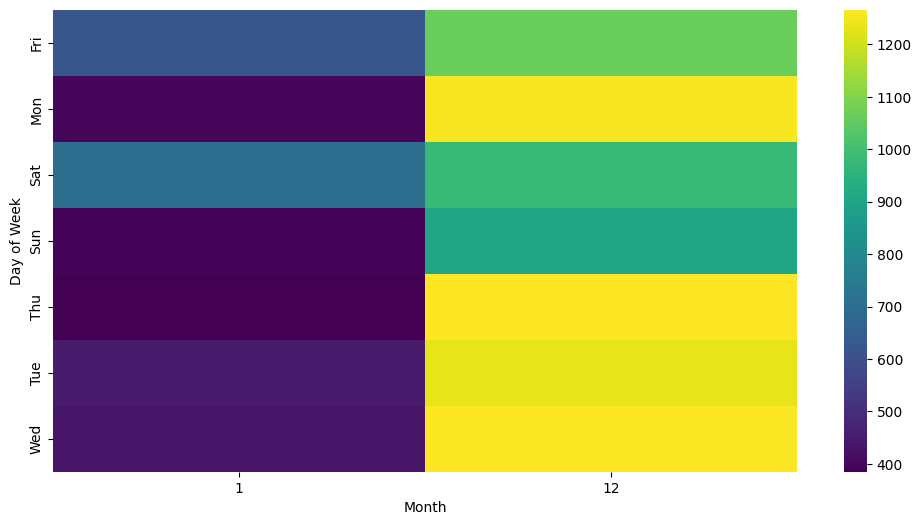

In [74]:
plt.figure(figsize= (12,6))
sns.heatmap(dayMonth, cmap = 'viridis')

Clustermap:

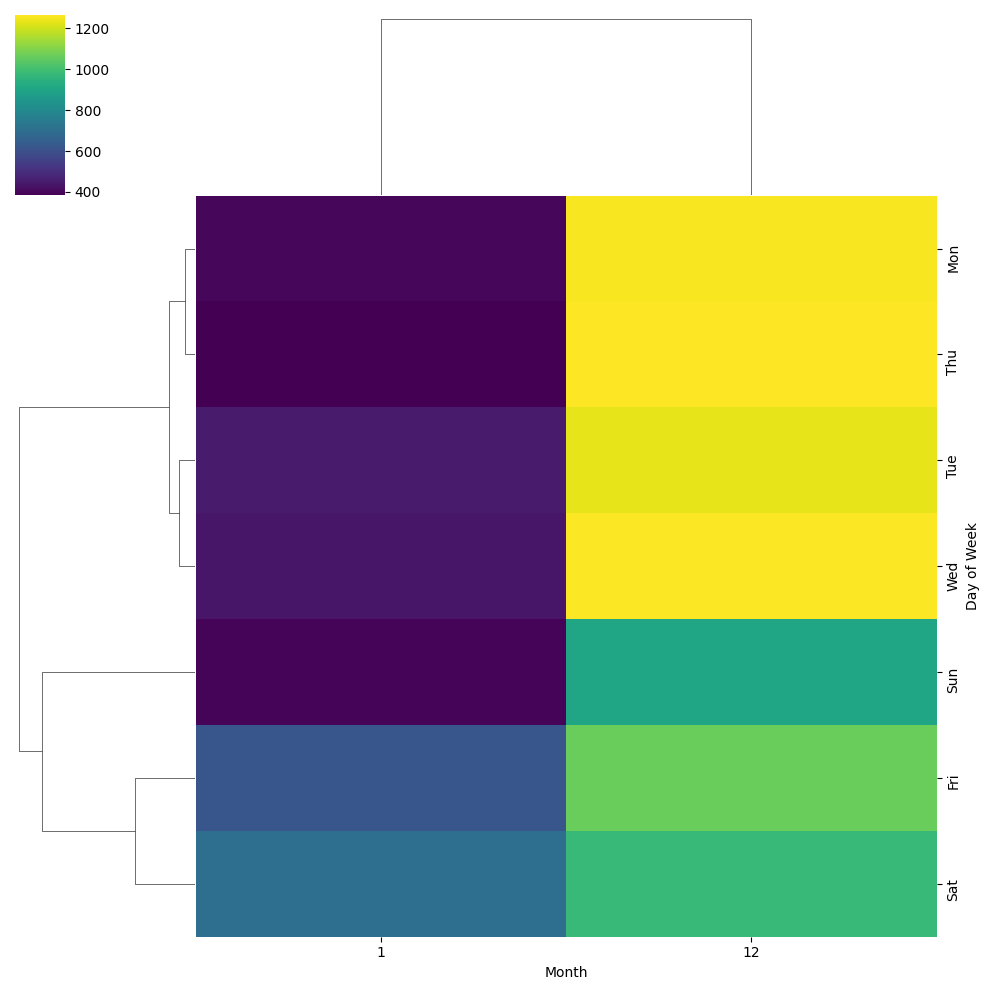

In [75]:
sns.clustermap(dayMonth, cmap = 'viridis')